In [128]:
from IPython.display import Image
from IPython.core.display import HTML 

## Where to find data?
- in the wild (scraping websites, Twitter, GAMS, etc)
- for practice - Kaggle (https://www.kaggle.com/datasets)

Kaggle is a really useful service where you can find data to play with and Notebooks to take inspiration and learn from. 
It also offers ML models you can try out and a community of people with data science interests.

You can also form groups and solve dataset issues to win competitions (sometimes with cash prizes) - https://www.kaggle.com/competitions.

Let's try out one of the intro-level challenges that already has a bunch of submissions - the Titanic dataset challenge (https://www.kaggle.com/competitions/titanic/overview/description). Kaggle has its own API that you can use to easily download the data.

Let's install the Kaggle library. People who have Anaconda can do it easily through the naviagtor, otherwise:

```
$pip install kaggle

```

or 

```
conda install -c conda-forge kaggle


```

Documentation:
- https://github.com/Kaggle/kaggle-api
- https://anaconda.org/conda-forge/kaggle


In [2]:
import kaggle


To be able to import this libary, you also need to create a user account, get your 'kaggle.json' file and place it under C:/Users/{username}/.kaggle.

More on how to do that here: https://github.com/Kaggle/kaggle-api

In [3]:
 ! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
b'arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 \xf0\x9f\x92\xb8                   25KB  2023-04-13 09:55:16          19881        558  1.0              '
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39           1574         45  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           2203         46  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                 

In [4]:
import os


In [5]:
%cd data


C:\Users\krusic\Documents\GitHub\programming2SS23\data


In [6]:
%mkdir Titanic

A subdirectory or file Titanic already exists.


In [7]:
%cd Titanic

C:\Users\krusic\Documents\GitHub\programming2SS23\data\Titanic


In [8]:
! kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


Now we have our data, let's unzip it and check what is there. There should be a train and test set which we will use to build our models on. 

The train set (the ground truth set) contains the outcome for each passender of the titanic (whether they survived or not) and has features such as gender and passenger class. For the test set, it' s our job to build a model to predict whether they survived or died on the Titanic.

The gender_submissions.csv is a set of predictions that serves an example of what the competition submission file should look like. More info on: https://www.kaggle.com/competitions/titanic/data

In [136]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [137]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

In [138]:
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
train_data.shape

(891, 12)

In [140]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [141]:
test_data.shape

(418, 11)

## EDA (Exploratory data analysis)

The Titanic competition also has a data dictionary, which explains the columns that make up the data set. Below are the descriptions contained in that data dictionary:



| Column      | Description                                                                               |
|-------------|-------------------------------------------------------------------------------------------|
| PassengerID | A column added by Kaggle to identify each row and make submissions easier                 |
| Survived    | Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)       |
| Pclass      | The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)                     |
| Sex         | The passenger's sex                                                                       |
| Age         | The passenger's age in years                                                              |
| SibSp       | The number of siblings or spouses the passenger had aboard the Titanic                    |
| Parch       | The number of parents or children the passenger had aboard the Titanic                    |
| Ticket      | The passenger's ticket number                                                             |
| Fare        | The fare the passenger paid                                                               |
| Cabin       | The passenger's cabin number                                                              |
| Embarked    | The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)          |



#### How many null values?

In [142]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Data types?

In [144]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [145]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### How many people survived?

<AxesSubplot:ylabel='Survived'>

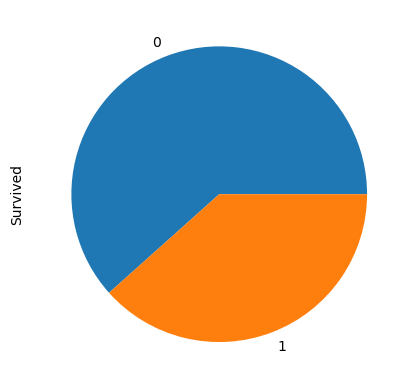

In [146]:
train_data['Survived'].value_counts().plot(kind='pie')

### How many people is there per class?

<AxesSubplot:ylabel='Pclass'>

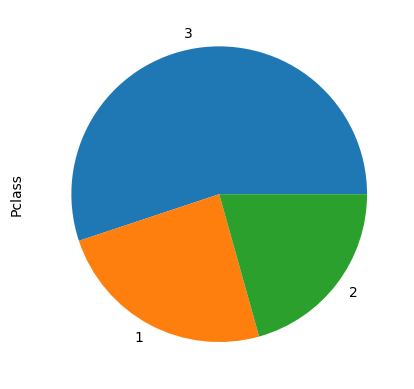

In [147]:
train_data['Pclass'].value_counts().plot(kind='pie')

### How many women survived and how many men survived in our training set?

In [148]:
sex_survived = train_data.groupby(['Sex','Survived'])['Survived'].count()
sex_survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

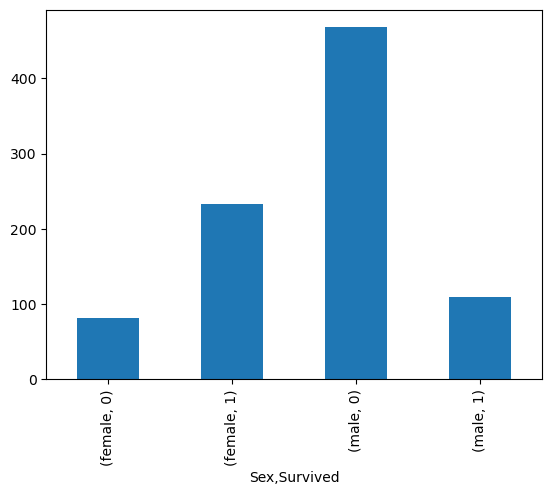

In [149]:
sex_survived.plot(kind="bar")

### How many people from different classes survived? (Did the wealthy have a higher chance of survival?)


In [150]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')


### How many prople survived depending on age?


In [151]:
print('Oldest Passenger was of:',train_data['Age'].max(),'Years')
print('Youngest Passenger was of:',train_data['Age'].min(),'Years')
print('Average Age on the ship:',train_data['Age'].mean(),'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [152]:
df = px.data.tips()
fig = px.violin(train_data, y="Age", x="Survived", color="Sex", box=True, points="all",
          hover_data=train_data.columns)
fig.show()

### Correlations?

In [153]:
# look at numeric and categorical values separately 
train_num = train_data[['Age','SibSp','Parch','Fare']]
train_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

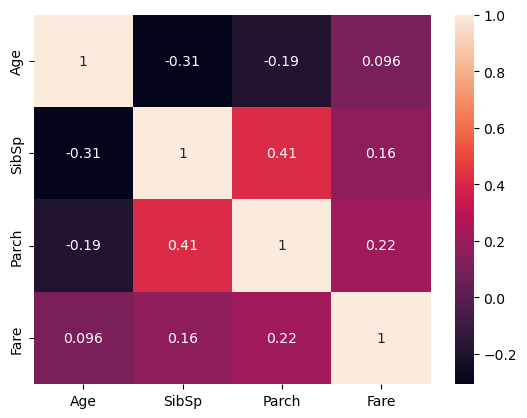

In [154]:
print(train_num.corr())
sns.heatmap(train_num.corr(),annot=True)

## Predict who's going to survive the Titanic disaster

In this tutorial, we're going to use two algorithms. One that we already know (Linear Regression) and one that we're going to learn about now.

## Clean data (NaN values)

We have a lot of Nans in the Ticket and Cabin columns, and By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.


In [155]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)


In [156]:
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

In [157]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)


In [158]:
train_data['Fare'].fillna(train_data['Fare'].median(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)


### Feature Engineering
Here we will try to make new features by analysing the existing features. This will increase our model efficiency and performance.



In [159]:
# Here the train and test dataset are stored in a list so that we dont have to manipulate both one by one
data_cleaner = [train_data, test_data]


In [160]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
        
    
    #Discrete variables - creates a family size with no. of siblings , spouse , parents or children.
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    #This will store the title of each person from its 'Name'.
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    #This will create a Fare Slab according to no. provided. In our case we want '4' Fare Slab.
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    
    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    #Same goes with here, we will have 6 Age categories.
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 6)



C:\Users\krusic\AppData\Local\Temp\ipykernel_35048\760712431.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krusic\AppData\Local\Temp\ipykernel_35048\760712431.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(13.333, 26.667]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(13.333, 26.667]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(26.667, 40.0]"


In [162]:

print(test_data['Title'].value_counts())


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


This will make a group of those titles which are less than 10 as 'Misc' column.



In [163]:
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (train_data['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
train_data['Title'] = train_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train_data['Title'].value_counts())

title_namest = (test_data['Title'].value_counts() < stat_min)
test_data['Title'] = test_data['Title'].apply(lambda x: 'Misc' if title_namest.loc[x] == True else x)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


### Label Encoding
It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1.

Below code will create two column 'AgeBin_Code' and 'FareBin_Code' and convert the bins( ex: AgeBin has {1-16},{16-24} ) to numeric value and label them according to the bins.



In [164]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
print(train_data.columns)
train_data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'FareBin', 'AgeBin', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(13.333, 26.667]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]",2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(13.333, 26.667]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]",2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(26.667, 40.0]",2,1


### Correlation between features


<AxesSubplot:>

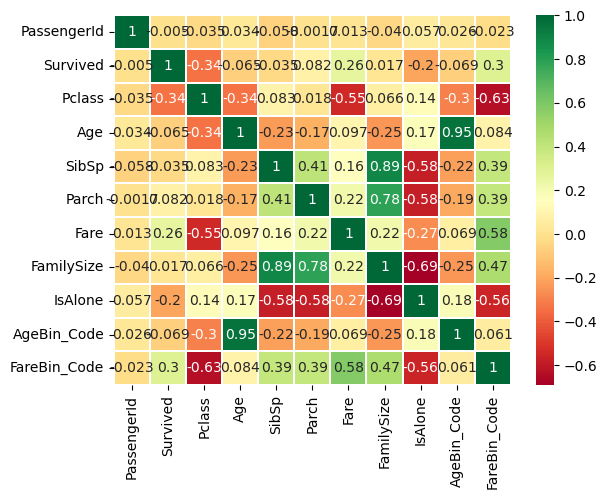

In [165]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 


We will select the features we want to include in our model



In [166]:
features_col=['Pclass','Sex','Embarked','IsAlone','Title','AgeBin_Code','FamilySize','FareBin_Code']
train_ds = train_data[features_col]
test_ds = test_data[features_col]
train_label = train_data['Survived']
print(train_ds.columns)
train_ds.head()

Index(['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Title', 'AgeBin_Code',
       'FamilySize', 'FareBin_Code'],
      dtype='object')


,Pclass,Sex,Embarked,IsAlone,Title,AgeBin_Code,FamilySize,FareBin_Code
0,3,male,S,0,Mr,1,2,0
1,1,female,C,0,Mrs,2,2,3
2,3,female,S,1,Miss,1,1,1
3,1,female,S,0,Mrs,2,2,3
4,3,male,S,1,Mr,2,1,1


## One Hot Encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Suppose we have Sex classes as 'male' and 'female'. One hot encoding will create two columns 'Sex_male' and 'Sex_female' and store the values as binary.



In [167]:
one_hot_encoded_training_predictors = pd.get_dummies(train_ds)
one_hot_encoded_testing_predictors = pd.get_dummies(test_ds)


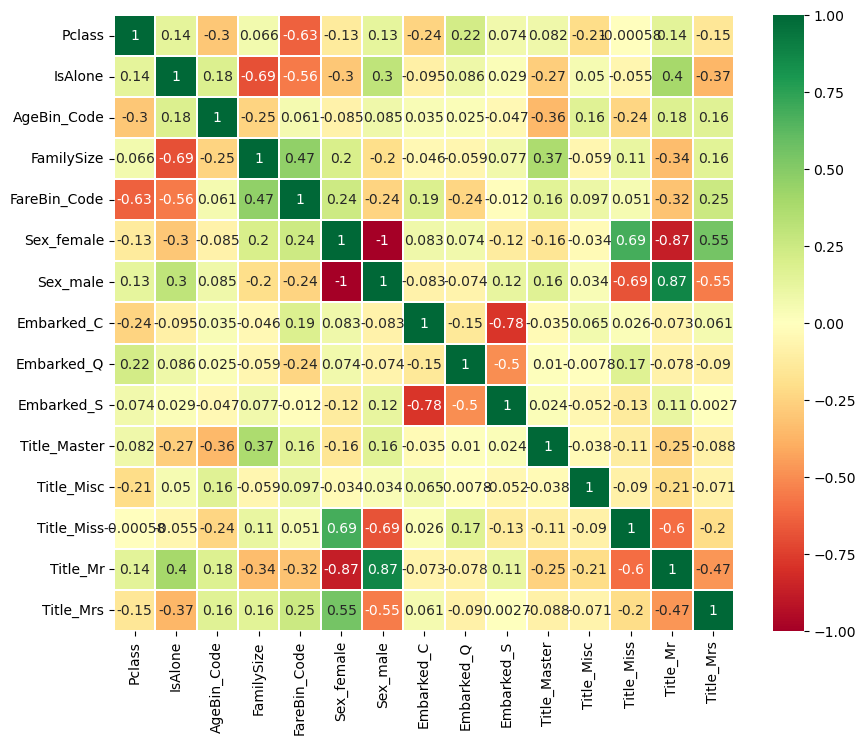

In [168]:
sns.heatmap(one_hot_encoded_training_predictors.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


Most Correlating features are (Sex_male,Title_Mr) , (Sex_female,Title_Miss) So , chances are they might have redundant data. Its better to remove one of the feature.



In [169]:
# Remove the correlated feature to reduce redundancy in model.
corln_col=['Title_Miss','Sex_male']
one_hot_encoded_training_predictors = one_hot_encoded_training_predictors.drop(corln_col,axis=1)
one_hot_encoded_testing_predictors = one_hot_encoded_testing_predictors.drop(corln_col,axis=1)


### Predictive Modeling


So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

* Logistic Regression

* Support Vector Machines

* K-Nearest Neighbours





In [170]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import svm #support vector Machine
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


### Train- test split


The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

The test_size=0.20 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.



In [171]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(one_hot_encoded_training_predictors, train_label, test_size=0.20)


### Logistic Regression


In [172]:
logreg_clf = LogisticRegression()
logreg_clf.fit(train_X, train_y)
pred_logreg = logreg_clf.predict(test_X)
acc_logreg = accuracy_score(test_y, pred_logreg)

print(acc_logreg)


0.8212290502793296


### K-Nearest Neighbours(KNN)

In [173]:
Image(url= "img/knn.png")
# source: Machine Learning for Absolute Beginners, Oliver Theobald

- k-NN classifies new data points based on their position to nearby data points
- using k-NN we can predict the category of the new data point based on its position regarding the other data points 
- we need to set k in order to determine how many data points we want to use to classify the new data point (e.g. if we set it to 3, k-NN will analyze it in respect to the 3 nearest data points, neighbours)
- default is 5
- it is useful to test numerous k combinations to find the best fit and avoid setting k to low or high
- too low - bias, to high - more computationally expensive
- this algorithm works best with continuous variables
- binary variables should be used only when critical for the model’s accuracy


In [174]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)
pred_knn = knn_clf.predict(test_X)
acc_knn = accuracy_score(test_y, pred_knn)

print(acc_knn)

0.8268156424581006


C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



### Linear Support Vector Machines


In [175]:
Image(url= "img/svm.png")
# source: Machine Learning for Absolute Beginners, Oliver Theobald

- useful to mitigate outliers and complex relationships
- wide margin - more mistakes, narrow margin - fewer mistakes, the goal is to strike balance
- you can use the hyperparameter C to make the margin softer/harder, e.g. 
- svm not recommended for low feature to row ratio (low nr of features relative to rows) 
- works well at untangling outliers from complex small and medium datasets and managing high dimensional data
- regularization and standardization are data scrubbing (used often with this algorithm)


In [176]:
linsvc_clf = LinearSVC(dual=False)
linsvc_clf.fit(train_X, train_y)
pred_linsvc = linsvc_clf.predict(test_X)
acc_linsvc = accuracy_score(test_y, pred_linsvc)

print(acc_linsvc)

0.8212290502793296


In [177]:
#Compare all model performance.
model_performance = pd.DataFrame({
    'Model': [ 'Linear SVM', 
              'Logistic Regression', 'K Nearest Neighbors'],
    'Accuracy': [ acc_linsvc, 
              acc_logreg, acc_knn]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,K Nearest Neighbors,0.826816
0,Linear SVM,0.821229
1,Logistic Regression,0.821229


## Choosing the right estimator


https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [132]:
Image(url= "img/sklearn.png")
# source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Literature, tutorials

* Exercises taken from - Machine Learning for Absolute Beginners, Oliver Theobald (https://www.amazon.de/gp/product/B08RWBSKQB/ref=ppx_yo_dt_b_d_asin_title_o00?ie=UTF8&psc=1) (https://bmansoori.ir/book/Machine%20Learning%20For%20Absolute%20Beginners.pdf)
* Tutorial accompanying the book -https://scatterplotpress.teachable.com/courses/enrolled/1247161
* Good tutorial on Kaggle -  https://www.kaggle.com/learn/intro-to-machine-learning
* Titanic notebook - https://www.kaggle.com/code/vjgupta/titanic-simple-model-beginners
* Titanic dataset -https://www.kaggle.com/competitions/titanic
* SKLearn tutorial - https://scikit-learn.org/stable/index.html